Successfully loaded 'data.csv'

Dataset Head:
              Timestamp   Sensor_ID  Sensor_Type  Value    Time_of_Day  \
0  2025-11-05T09:00:01    Door-001         Door    1.0  Working_Hours   
1  2025-11-05T09:00:02  Motion-001       Motion    1.0  Working_Hours   
2  2025-11-05T09:00:03    Temp-001  Temperature   21.5  Working_Hours   
3  2025-11-05T09:00:04  Window-001       Window    0.0  Working_Hours   
4  2025-11-05T09:00:05    Door-001         Door    0.0  Working_Hours   

  Day_of_Week   Label  
0     Weekday  Normal  
1     Weekday  Normal  
2     Weekday  Normal  
3     Weekday  Normal  
4     Weekday  Normal   

Value Counts for 'Label':
 Label
Normal       284
Anomalous     20
Name: count, dtype: int64

Label mapping: {'Anomalous': np.int64(0), 'Normal': np.int64(1)}

Data preprocessing complete.

Model training complete.

Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

   Anomalous       1.00      1.00      1.00      

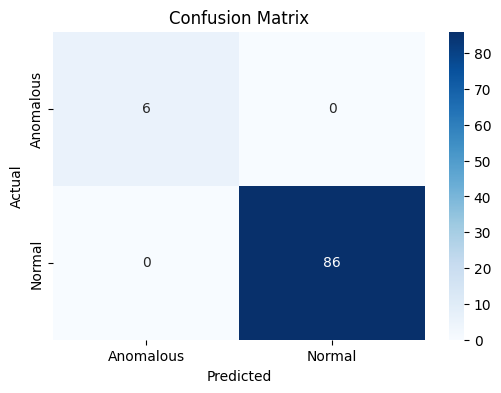


Starting real-time monitoring simulation...

Data: {'Sensor_ID': 'Door-001', 'Sensor_Type': 'Door', 'Value': 1, 'Time_of_Day': 'Working_Hours', 'Day_of_Week': 'Weekday'}
Prediction: -> Normal <-
------------------------------
Data: {'Sensor_ID': 'Door-002', 'Sensor_Type': 'Door', 'Value': 1, 'Time_of_Day': 'Night', 'Day_of_Week': 'Weekday'}
Prediction: -> Anomalous <-
*** ALERT: ANOMALOUS ACTIVITY DETECTED! ***
------------------------------
Data: {'Sensor_ID': 'Motion-001', 'Sensor_Type': 'Motion', 'Value': 0, 'Time_of_Day': 'Night', 'Day_of_Week': 'Weekend'}
Prediction: -> Normal <-
------------------------------
Data: {'Sensor_ID': 'Temp-001', 'Sensor_Type': 'Temperature', 'Value': 45.0, 'Time_of_Day': 'Working_Hours', 'Day_of_Week': 'Weekday'}
Prediction: -> Normal <-
------------------------------


In [3]:
# ============================================================
# ML-based Intrusion Detection for Smart Building IoT
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')

# ============================================================
# 1. Load Data
# ============================================================

filename = 'data.csv'

try:
    data = pd.read_csv(filename)
    print(f"Successfully loaded '{filename}'\n")
    print("Dataset Head:\n", data.head(), "\n")
    print("Value Counts for 'Label':\n", data['Label'].value_counts())
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    print("Please make sure 'data.csv' is in the same directory as this script.")
    data = None
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    data = None


# ============================================================
# 2. Data Preprocessing
# ============================================================

if data is not None:
    X = data.drop(['Timestamp', 'Label'], axis=1)
    y = data['Label']

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    print(f"\nLabel mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

    categorical_features = ['Sensor_ID', 'Sensor_Type', 'Time_of_Day', 'Day_of_Week']
    numerical_features = ['Value']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

    print("\nData preprocessing complete.")
else:
    print("Data not loaded. Skipping preprocessing.")


# ============================================================
# 3. Model Training
# ============================================================

if data is not None:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    model_pipeline.fit(X_train, y_train)
    print("\nModel training complete.")
else:
    print("Data not loaded. Skipping model training.")


# ============================================================
# 4. Model Evaluation
# ============================================================

if data is not None:
    y_pred = model_pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy * 100:.2f}%\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("Data not loaded. Skipping model evaluation.")


# ============================================================
# 5. Real-time Monitoring Simulation
# ============================================================

def monitor_new_packet(packet_data):
    """
    Simulates the hub receiving and processing a new packet.
    'packet_data' should be a dictionary.
    """
    if 'model_pipeline' not in globals():
        print("Error: Model was not trained. Cannot make predictions.")
        return

    input_df = pd.DataFrame([packet_data])
    prediction_encoded = model_pipeline.predict(input_df)
    prediction_label = le.inverse_transform(prediction_encoded)[0]

    print(f"Data: {packet_data}")
    print(f"Prediction: -> {prediction_label} <-")

    if prediction_label == 'Anomalous':
        print("*** ALERT: ANOMALOUS ACTIVITY DETECTED! ***")
    print("-" * 30)


# ============================================================
# 6. Real-time Simulation
# ============================================================

if data is not None:
    print("\nStarting real-time monitoring simulation...\n")

    normal_packet = {
        'Sensor_ID': 'Door-001',
        'Sensor_Type': 'Door',
        'Value': 1,
        'Time_of_Day': 'Working_Hours',
        'Day_of_Week': 'Weekday'
    }
    monitor_new_packet(normal_packet)

    anomalous_packet = {
        'Sensor_ID': 'Door-002',
        'Sensor_Type': 'Door',
        'Value': 1,
        'Time_of_Day': 'Night',
        'Day_of_Week': 'Weekday'
    }
    monitor_new_packet(anomalous_packet)

    normal_night_packet = {
        'Sensor_ID': 'Motion-001',
        'Sensor_Type': 'Motion',
        'Value': 0,
        'Time_of_Day': 'Night',
        'Day_of_Week': 'Weekend'
    }
    monitor_new_packet(normal_night_packet)

    temp_anomaly_packet = {
        'Sensor_ID': 'Temp-001',
        'Sensor_Type': 'Temperature',
        'Value': 45.0,
        'Time_of_Day': 'Working_Hours',
        'Day_of_Week': 'Weekday'
    }
    monitor_new_packet(temp_anomaly_packet)
else:
    print("Data not loaded. Skipping real-time simulation.")
